In [16]:
from scipy.spatial import distance
import cv2 as cv
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import scipy.stats as st

In [17]:
def draw_rect(cx, cy, w, h, color='red', width=4):
    """
    Requires `import matplotlib as mpl`
    """
    ax = plt.gca()

    t, b = cy-h//2, cy+h//2
    l, r = cx-w//2, cx+w//2
       
    rect = mpl.lines.Line2D([l,l,r,r,l],[t,b,b,t,t],color=color,linewidth=width)
    ax.add_line(rect)
    return int(t), int(b), int(l), int(r)

E(-4,0) = 19.608802157138122


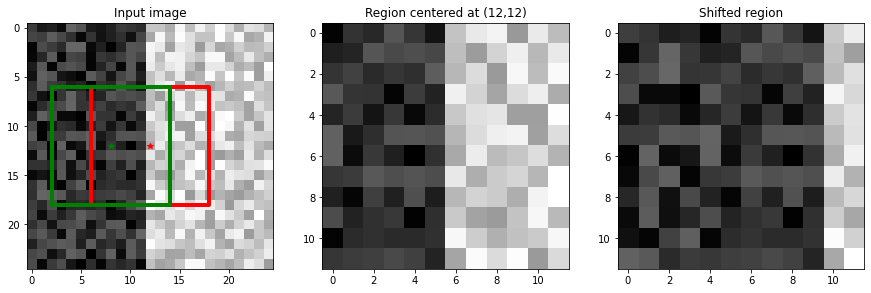

In [20]:
#I = np.random.rand(25,25)*0.4 # Flat
#I[12:,12:] = np.random.rand(13,13)*0.4+0.6 # Corner
I[:,12:] = np.random.rand(25,13)*0.4+0.6 # Line
#I[0,0] = 1.0

cx, cy, w, h = 12, 12, 12, 12
u, v = -4, 0

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Input image')
plt.imshow(I, interpolation='none', cmap='gray')
t, b, l, r = draw_rect(cx, cy, w, h)
plt.plot([cx],[cx],'r*')
t_shifted, b_shifted, l_shifted, r_shifted = draw_rect(cx+u, cy+v, w, h, color='green')
plt.plot([cx+u],[cy+v],'g*')
plt.subplot(132)
plt.title('Region centered at ({},{})'.format(cx,cy))
I_region = I[t:b,l:r]
plt.imshow(I_region, interpolation='none', cmap='gray')
plt.subplot(133)
plt.title('Shifted region')
I_shifted = I[t_shifted:b_shifted,l_shifted:r_shifted]
plt.imshow(I_shifted, interpolation='none', cmap='gray')
E = np.sum(np.square(I_region - I_shifted)) # Assume w(x,y)=1.0
print('E({},{}) = {}'.format(u,v,E))

In [22]:
E = np.zeros((13,13), dtype=np.float32)
for u in np.arange(-6,7):
    for v in np.arange(-6,7):
        t, b = int(cy-h//2), int(cy+h//2)
        l, r = int(cx-w//2), int(cx+w//2)
        ts, bs, ls, rs = t+v, b+v, l+u, r+u   
        E[u+6,v+6] = np.sum(np.square(I[t:b,l:r] - I[ts:bs,ls:rs]))

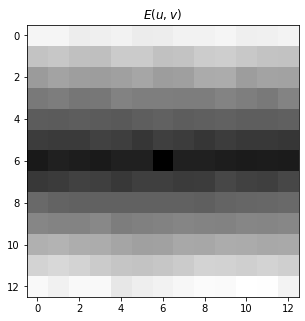

In [23]:
plt.figure(figsize=(5,5))
plt.title('$E(u,v)$')
plt.imshow(E, cmap='gray')

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(0,13)
Y = np.arange(0,13)
X, Y = np.meshgrid(X, Y)
Z = E
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Interest Points - Exercise 01

M at (7,7) =
 [[502.4  163.84]
 [163.84 502.4 ]]


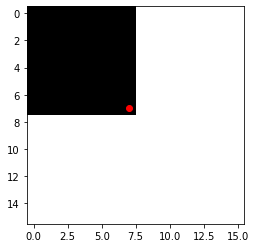

In [10]:
# %load solutions/interest-points/solution-01.py
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

I = np.ones((16,16), dtype='float')
I[:8,:8] = np.zeros((8,8))
plt.imshow(I, cmap='gray')
plt.plot(7,7,'ro')

Ix = cv.Sobel(I, cv.CV_64F, 1, 0, ksize=5)
Iy = cv.Sobel(I, cv.CV_64F, 0, 1, ksize=5)

Ix2 = np.multiply(Ix,Ix)
Iy2 = np.multiply(Iy,Iy)
IxIy = np.multiply(Ix,Iy)

SIx2 = cv.blur(Ix2, (5,5)).flatten()
SIy2 = cv.blur(Iy2, (5,5)).flatten()
SIxIy = cv.blur(IxIy, (5,5)).flatten()


M = np.vstack((SIx2, SIxIy, SIxIy, SIy2 )).reshape(4,16,16)
print('M at (7,7) =\n', M[:,7,7].reshape(2,2))

In [6]:
print(SIx2.shape)
print(I.shape[0] * I.shape[1])

(256,)
256


In [7]:
foo = np.vstack((SIx2, SIxIy, SIxIy, SIy2))
print(foo.shape)

(4, 256)


In [24]:
filename = 'data/corners-multiscale.png'
img = cv.imread(filename) 
img = cv.resize(img, (256,256))
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

plt.figure(figsize=(5,5))
plt.imshow(img)

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-vo4apon2/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
